<a href="https://colab.research.google.com/github/phandat128/Football-player-predict/blob/main/ML_project_attack_position.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('attack.csv')
df.head(3)

,name,age,Contract valid until,Overall rating,Potential,Value,Wage,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Acceleration,Sprint speed,Agility,Reactions,Balance,Shot power,Jumping,Stamina,Strength,Long shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defensive awareness,Standing tackle,Sliding tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,K. Mbappé,23,2024,91,95,190500000.0,230000.0,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,84,88,26,34,32,13.0,5.0,7.0,11.0,6.0
1,E. Haaland,21,2027,90,94,176500000.0,240000.0,47,95,80,75,89,78,77,62,53,82,82,94,76,93,74,94,78,79,93,86,87,42,95,74,84,87,41,53,29,7.0,14.0,13.0,11.0,7.0
2,Vinícius Jr.,21,2025,86,92,109000000.0,200000.0,72,84,50,75,72,92,77,62,73,89,95,95,94,82,83,76,75,84,64,76,58,26,82,75,65,79,32,25,18,5.0,7.0,7.0,7.0,10.0


In [4]:
df.drop(['name', 'age', 'Overall rating', 'Potential', 'Wage', 'Interceptions', 'Defensive awareness', 'Standing tackle', 'Sliding tackle', 'Contract valid until', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

Value               0
Crossing            0
Finishing           0
Heading accuracy    0
Short passing       0
Volleys             0
Dribbling           0
Curve               0
FK Accuracy         0
Long passing        0
Ball control        0
Acceleration        0
Sprint speed        0
Agility             0
Reactions           0
Balance             0
Shot power          0
Jumping             0
Stamina             0
Strength            0
Long shots          0
Aggression          0
Positioning         0
Vision              0
Penalties           0
Composure           0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [5]:
numeric_columns = df.select_dtypes('number').columns
for column in numeric_columns:
  if column == 'Value': continue
  df[column] = df[column]/100
df['Value'] = np.log(df['Value'])

In [ ]:
df.describe()

,Value,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Acceleration,Sprint speed,Agility,Reactions,Balance,Shot power,Jumping,Stamina,Strength,Long shots,Aggression,Positioning,Vision,Penalties,Composure
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,15.693141,0.624458,0.726250,0.629417,0.706014,0.660514,0.751153,0.650597,0.570569,0.599347,0.750750,0.754208,0.755000,0.740639,0.712778,0.709056,0.739972,0.664083,0.686806,0.672139,0.682972,0.584139,0.732917,0.676458,0.665889,0.702000
std,1.228794,0.126839,0.076251,0.138273,0.079586,0.105937,0.075767,0.122990,0.129730,0.114565,0.071929,0.102120,0.094936,0.107523,0.089211,0.121119,0.077220,0.130824,0.103780,0.131531,0.089438,0.144735,0.082416,0.101033,0.094459,0.091532
min,13.345507,0.260000,0.350000,0.220000,0.470000,0.210000,0.510000,0.310000,0.290000,0.300000,0.540000,0.340000,0.330000,0.330000,0.430000,0.310000,0.380000,0.300000,0.320000,0.290000,0.290000,0.250000,0.480000,0.390000,0.350000,0.450000
25%,14.731801,0.540000,0.680000,0.540000,0.650000,0.580000,0.700000,0.560000,0.470000,0.510000,0.700000,0.690000,0.690000,0.677500,0.660000,0.650000,0.690000,0.580000,0.630000,0.590000,0.630000,0.470000,0.680000,0.610000,0.600000,0.650000
50%,15.607270,0.650000,0.730000,0.650000,0.720000,0.680000,0.760000,0.660000,0.560000,0.610000,0.760000,0.760000,0.760000,0.755000,0.730000,0.720000,0.750000,0.670000,0.690000,0.680000,0.690000,0.590000,0.740000,0.690000,0.660000,0.710000
75%,16.648724,0.720000,0.772500,0.740000,0.760000,0.740000,0.810000,0.750000,0.670000,0.680000,0.800000,0.830000,0.820000,0.820000,0.770000,0.790000,0.800000,0.760000,0.760000,0.760000,0.750000,0.690000,0.790000,0.750000,0.720000,0.770000
max,19.065163,0.900000,0.950000,0.910000,0.910000,0.900000,0.950000,0.930000,0.930000,0.900000,0.940000,0.970000,0.970000,0.940000,0.930000,0.950000,0.940000,0.920000,0.910000,0.950000,0.910000,0.910000,0.950000,0.940000,0.920000,0.960000


###Utility function

In [ ]:
def scatterPlotToTarget(columns, target, ncolumns=3):
  nrows = math.ceil(len(columns)/ncolumns)
  fig, axs = plt.subplots(nrows, ncolumns, figsize=(5*ncolumns, nrows*5))
  for i in range(nrows):
    for j in range(ncolumns):
      col_index = i*ncolumns + j
      if col_index >= len(columns): break
      axs[i,j].scatter(x=df[columns[col_index]], y=df[target])
      axs[i,j].set_title(columns[col_index])
      axs[i,j].margins(0.5)
      #correlation
      correlation = df[target].corr(df[columns[col_index]])
      axs[i,j].annotate(f'corr: {correlation}', (0.8, 0.2), xycoords='axes fraction', ha='center', va='center')
  fig.tight_layout()

In [ ]:
def plot_boxplot(columns, title, ncolumns=3):
  nrows = math.ceil(len(columns)/ncolumns)
  fig, axs = plt.subplots(nrows, ncolumns, figsize=(5*ncolumns, nrows*5))
  fig.suptitle(title)
  for i in range(nrows):
    for j in range(ncolumns):
      col_index = i*ncolumns + j
      if col_index >= len(columns): break
      axs[i,j].boxplot(x=df[columns[col_index]])
      axs[i,j].set_title(columns[col_index])
      axs[i,j].margins(0.5)
  fig.tight_layout()

In [6]:
# remove outliers
def outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    Lower_fence = Q1 - (1.5*IQR)
    print(f"Lower fence is = {Lower_fence}")

    Higher_fence = Q3 + (1.5*IQR)
    print(f"Higher fence is = {Higher_fence}")


    #With the help of "index" function here we are getting all the indexes of Lower_fence and Higher_fence

    IndexL_Outlier = data[data[column] < Lower_fence ].index
    IndexH_Outlier = data[data[column] > Higher_fence].index

    group_df = data.groupby(np.arange(len(data.index))//10, axis=0).mean()
    for i in IndexL_Outlier:
      data[column][i] = group_df[column][i//10]
    for i in IndexH_Outlier:
      data[column][i] = group_df[column][i//10]

    print(f'Applied to {len(IndexL_Outlier) + len(IndexH_Outlier)} row(s) of {column} column')

###Next

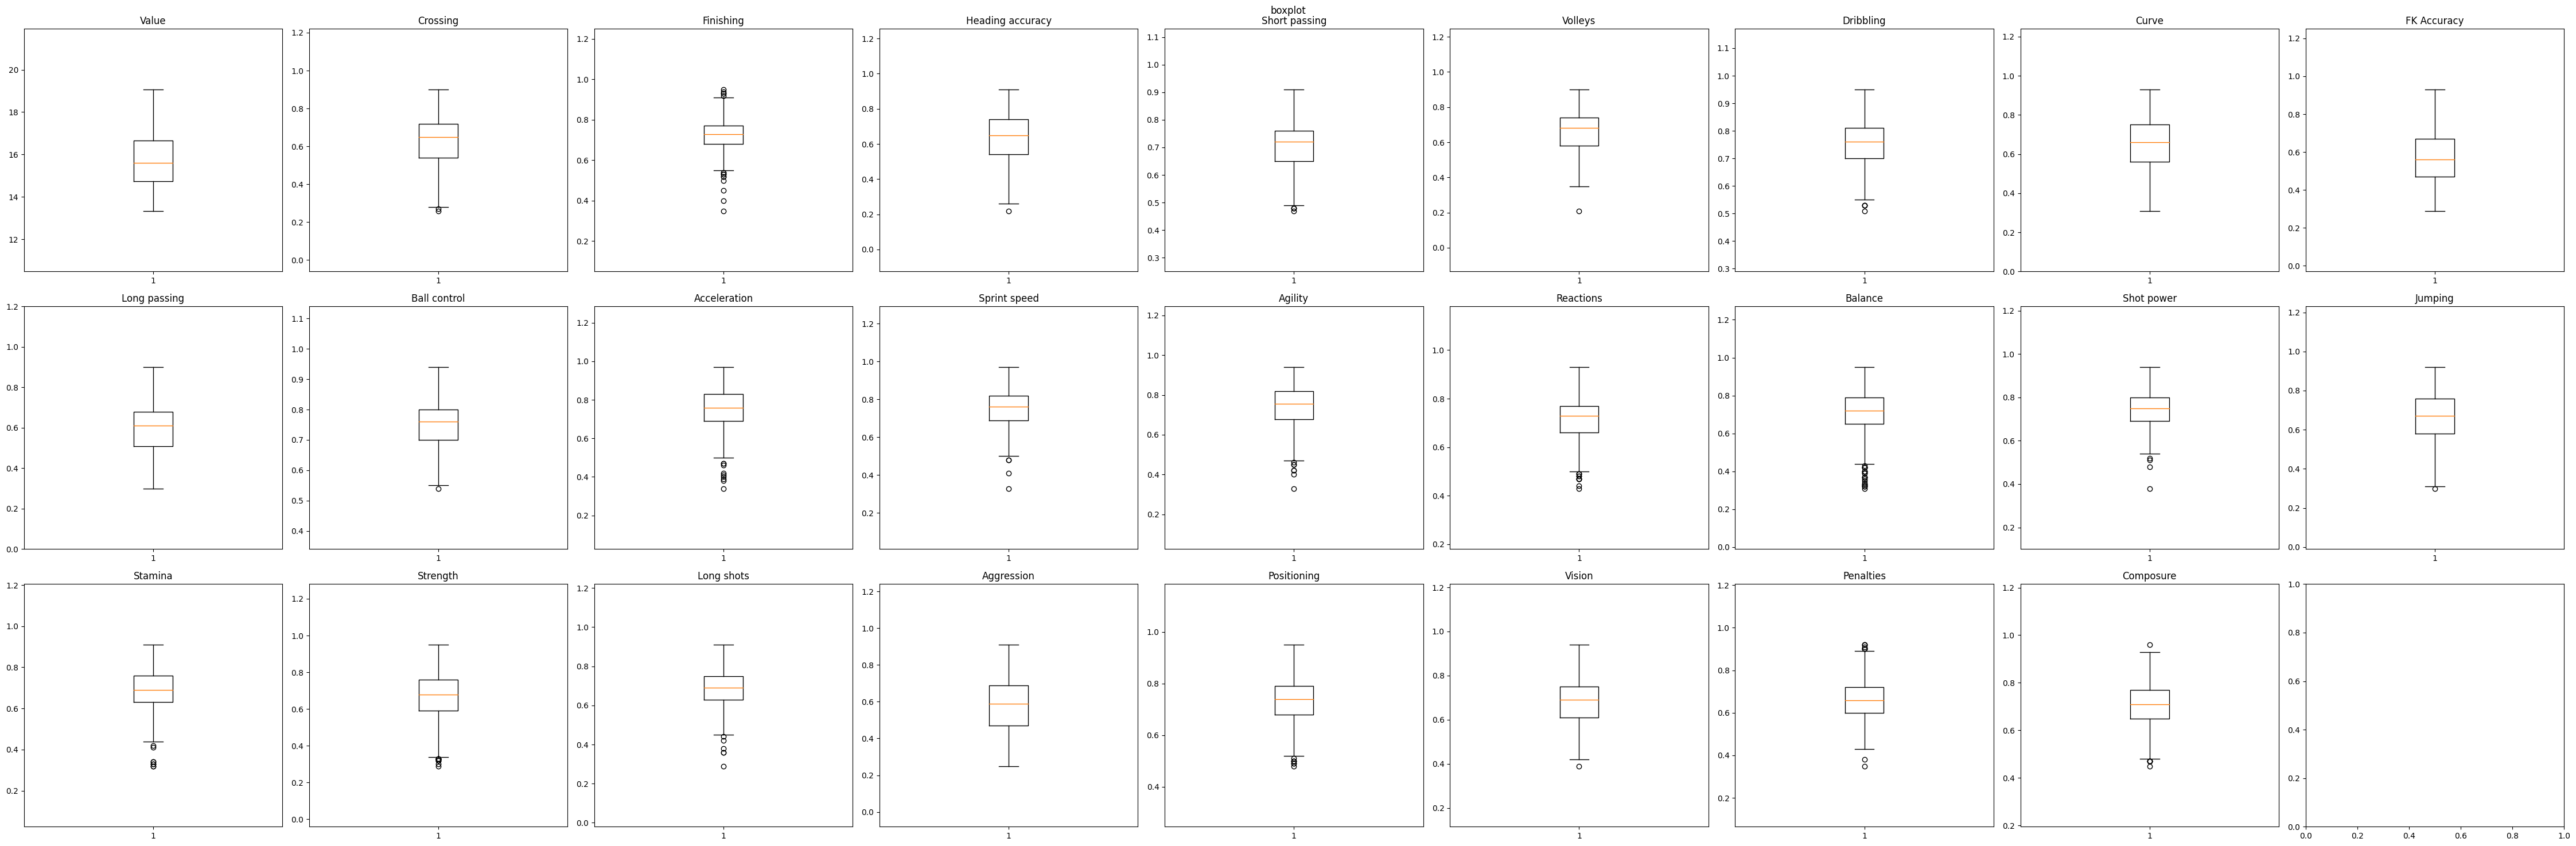

In [ ]:
plot_boxplot(numeric_columns, "boxplot", 9)

In [7]:
for column in df.columns:
  outliers(df, column)

Lower fence is = 11.85641737156534
Higher fence is = 19.52410782029358
Applied to 0 row(s) of Value column
Lower fence is = 0.27000000000000013
Higher fence is = 0.9899999999999999
Applied to 2 row(s) of Crossing column
Lower fence is = 0.5412500000000002
Higher fence is = 0.9112499999999999
Applied to 15 row(s) of Finishing column
Lower fence is = 0.2400000000000001
Higher fence is = 1.04
Applied to 1 row(s) of Heading accuracy column
Lower fence is = 0.48500000000000004
Higher fence is = 0.925
Applied to 4 row(s) of Short passing column
Lower fence is = 0.3399999999999999
Higher fence is = 0.98
Applied to 1 row(s) of Volleys column
Lower fence is = 0.5349999999999998
Higher fence is = 0.9750000000000002
Applied to 4 row(s) of Dribbling column
Lower fence is = 0.27500000000000013
Higher fence is = 1.035
Applied to 0 row(s) of Curve column
Lower fence is = 0.16999999999999987
Higher fence is = 0.9700000000000002
Applied to 0 row(s) of FK Accuracy column
Lower fence is = 0.2549999999999

<Axes: >

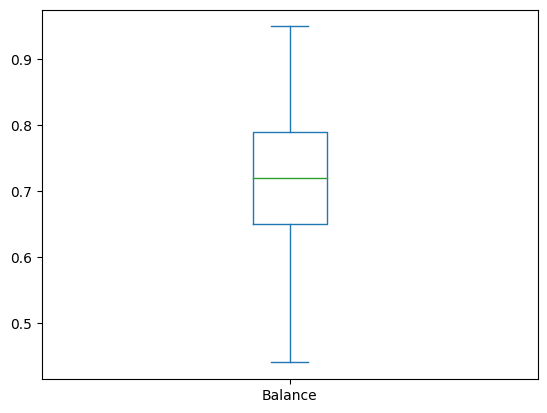

In [ ]:
df['Balance'].plot.box()

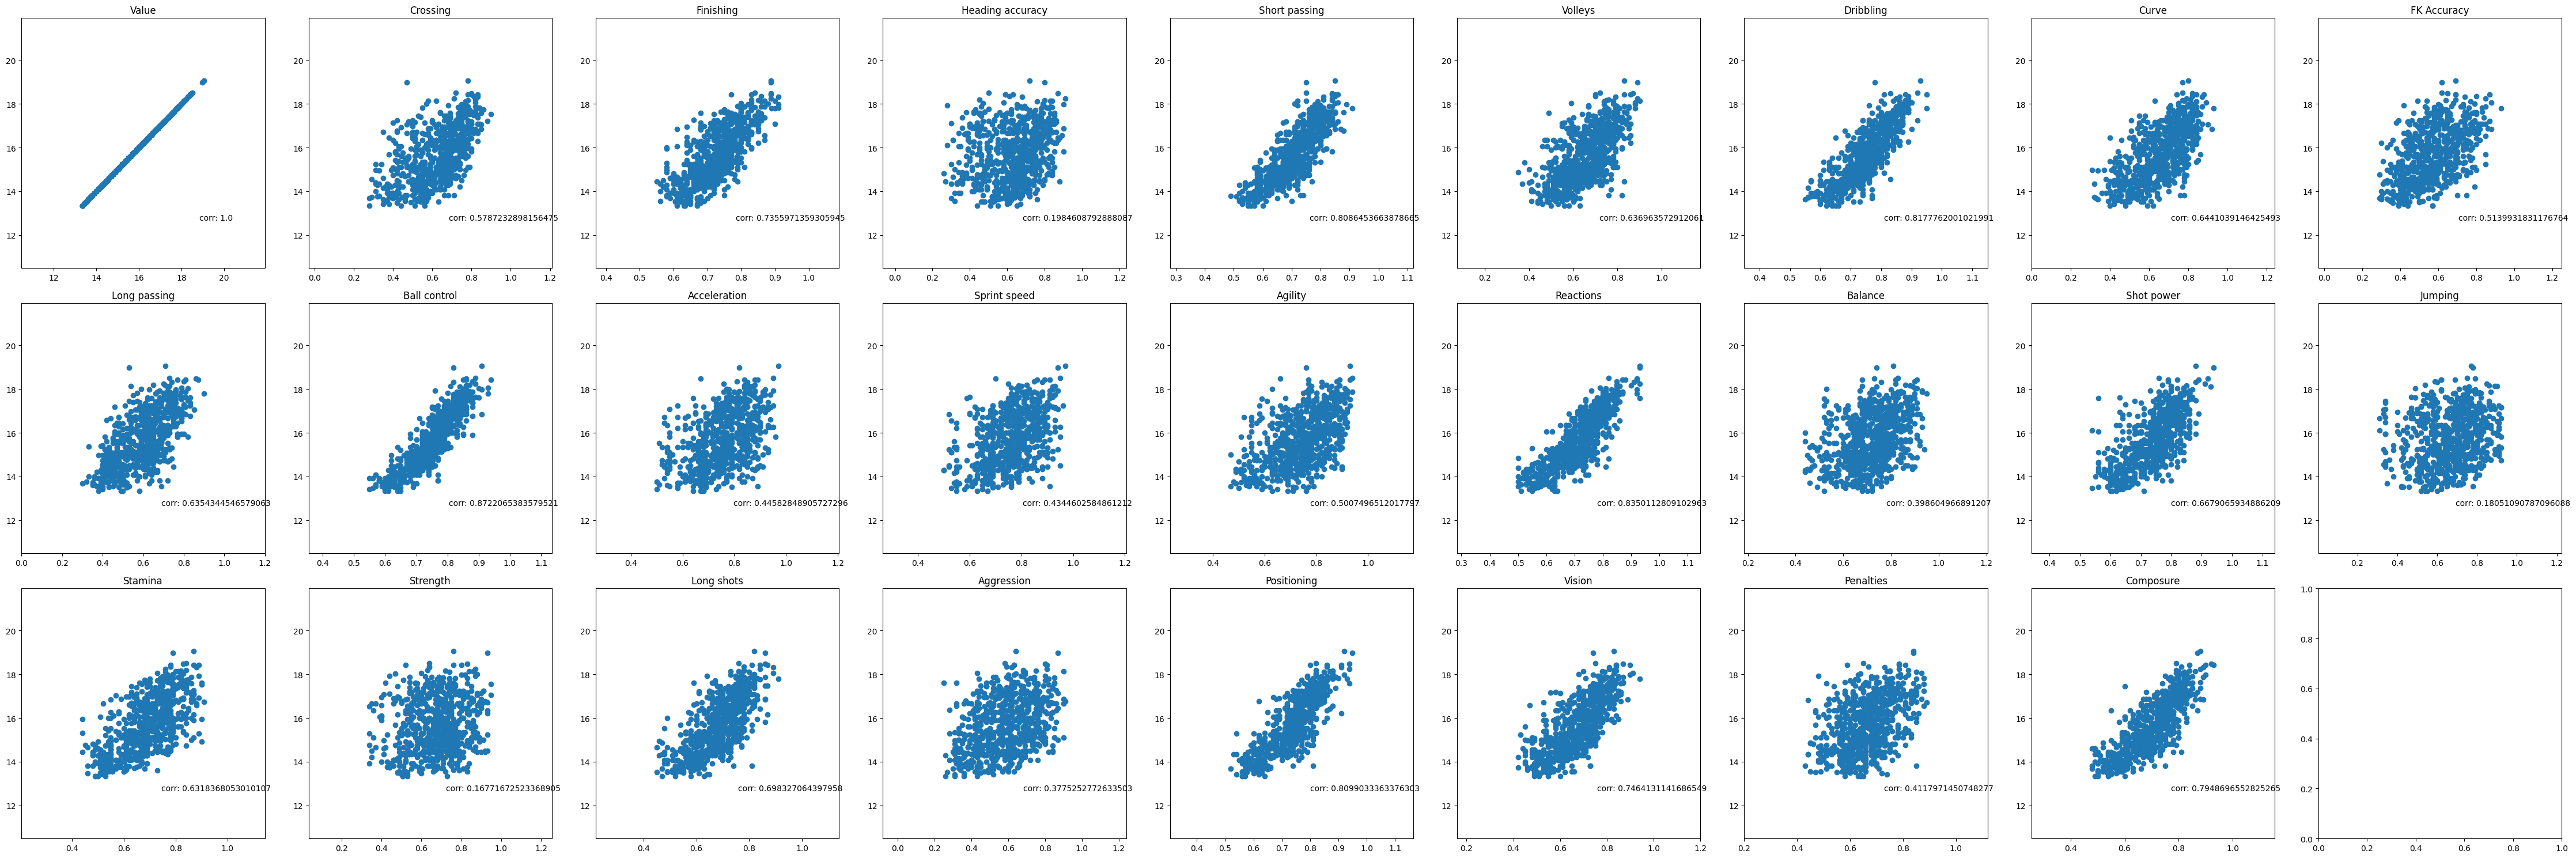

In [ ]:
scatterPlotToTarget(numeric_columns, target='Value', ncolumns=9)

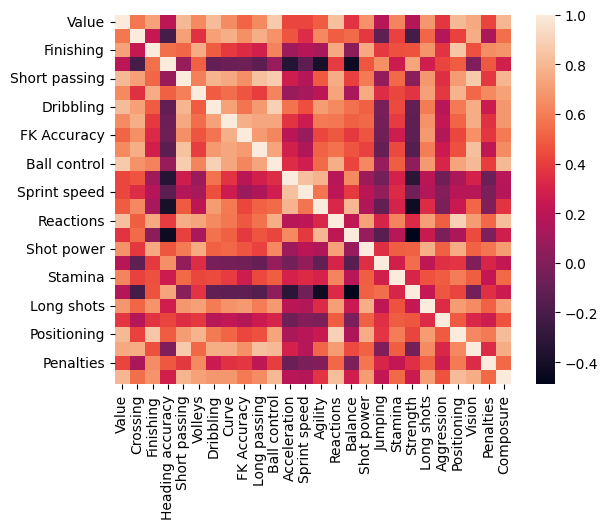

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False)
plt.show()

In [ ]:
correlation_matrix

,Value,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Acceleration,Sprint speed,Agility,Reactions,Balance,Shot power,Jumping,Stamina,Strength,Long shots,Aggression,Positioning,Vision,Penalties,Composure
Value,1.000000,0.579345,0.716683,0.200067,0.805859,0.635853,0.815929,0.644104,0.513993,0.635434,0.870728,0.429574,0.425186,0.489436,0.826404,0.363966,0.664553,0.182749,0.619909,0.172866,0.683534,0.377525,0.803189,0.742027,0.418693,0.792171
Crossing,0.579345,1.000000,0.235124,-0.211974,0.712372,0.355324,0.714380,0.765833,0.653255,0.766565,0.667278,0.465773,0.341128,0.628275,0.499850,0.539190,0.381990,-0.126514,0.414134,-0.220793,0.520914,0.170280,0.413905,0.757047,0.144584,0.549107
Finishing,0.716683,0.235124,1.000000,0.547847,0.522988,0.759796,0.489781,0.387134,0.327334,0.282269,0.612125,0.098909,0.175356,0.130608,0.745208,0.039162,0.741550,0.388061,0.455835,0.464375,0.670779,0.363950,0.849983,0.458926,0.647076,0.670791
Heading accuracy,0.200067,-0.211974,0.547847,1.000000,0.080839,0.501382,-0.108489,-0.076749,-0.071987,-0.129964,0.075501,-0.337904,-0.130711,-0.395015,0.394551,-0.437281,0.472517,0.653576,0.259085,0.728401,0.276191,0.422133,0.491726,-0.007456,0.477649,0.279377
Short passing,0.805859,0.712372,0.522988,0.080839,1.000000,0.601832,0.784976,0.738546,0.656252,0.836610,0.874099,0.264493,0.178824,0.483468,0.756335,0.401951,0.582662,0.065030,0.533741,0.027668,0.684629,0.347350,0.697621,0.869827,0.383340,0.788353
Volleys,0.635853,0.355324,0.759796,0.501382,0.601832,1.000000,0.489261,0.543122,0.466442,0.398972,0.621547,0.084290,0.124386,0.203356,0.731802,0.127901,0.754431,0.341334,0.427016,0.363557,0.709455,0.381526,0.783549,0.525305,0.634739,0.718132
Dribbling,0.815929,0.714380,0.489781,-0.108489,0.784976,0.489261,1.000000,0.715393,0.564438,0.690331,0.891898,0.559735,0.447805,0.701575,0.636779,0.553259,0.502203,-0.030952,0.439659,-0.114869,0.592273,0.183021,0.584843,0.759339,0.254424,0.680863
Curve,0.644104,0.765833,0.387134,-0.076749,0.738546,0.543122,0.715393,1.000000,0.771943,0.736796,0.732602,0.360831,0.256451,0.582191,0.580928,0.503710,0.526390,-0.045109,0.392172,-0.119533,0.666734,0.215457,0.516773,0.758728,0.355318,0.681392
FK Accuracy,0.513993,0.653255,0.327334,-0.071987,0.656252,0.466442,0.564438,0.771943,1.000000,0.694466,0.622033,0.194478,0.081438,0.429695,0.478915,0.385201,0.470013,-0.061148,0.263157,-0.123443,0.687579,0.168367,0.424827,0.659382,0.376461,0.581309
Long passing,0.635434,0.766565,0.282269,-0.129964,0.836610,0.398972,0.690331,0.736796,0.694466,1.000000,0.732448,0.280136,0.153764,0.507942,0.553826,0.467188,0.413466,-0.093407,0.434995,-0.159260,0.593125,0.252583,0.458106,0.827444,0.210605,0.640717


In [11]:
from sklearn.model_selection import train_test_split

y = df['Value']
X = df.drop(['Value'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate

models = {
    'linear_regression': LinearRegression(),
    'mlp_model': MLPRegressor((50, 50), activation='relu'),
    'decision_tree': DecisionTreeRegressor(),
    'random_forest': RandomForestRegressor(100)
}
reg_linear_models = {
    'ridge_regression': Ridge(),
    'lasso_regression': Lasso(),
}

for (model_name, model) in models.items():
  cv_results = cross_validate(model, X_train, y_train, cv=5, return_estimator=True)
  y_pred = [estimator.predict(X_test) for estimator in cv_results['estimator']]
  y_pred = np.average(y_pred, axis=0)
  print(model_name)
  print('MAE: ', mean_absolute_error(y_test, y_pred))
  print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
  print('r2 score: ', r2_score(y_test, y_pred))
  print()

linear_regression
MAE:  0.3257328434598933
RMSE:  0.4070413298540869
r2 score:  0.8888889415979919

mlp_model
MAE:  0.4275338640917046
RMSE:  0.5340001083276369
r2 score:  0.8087669473423135

decision_tree
MAE:  0.34745523649453386
RMSE:  0.443546876513124
r2 score:  0.8680652136858373

random_forest
MAE:  0.33463165835188097
RMSE:  0.4205610706817898
r2 score:  0.881385329490522



In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'ridge_regression': {'alpha': np.arange(0.1, 0.2, 0.01)},
    'lasso_regression': {'alpha': np.arange(0.0001, 0.001, 0.0001)}
}

for (model_name, model) in reg_linear_models.items():
  grid_search = GridSearchCV(model, param_grid[model_name], scoring='r2')
  grid_search.fit(X_train, y_train)
  reg_linear_models[model_name] = grid_search.best_estimator_
  reg_linear_models[model_name].fit(X_train, y_train)
  y_pred = reg_linear_models[model_name].predict(X_test)
  print(reg_linear_models[model_name])
  print('MAE: ', mean_absolute_error(y_test, y_pred))
  print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
  print('r2 score: ', r2_score(y_test, y_pred))
  print()

Ridge(alpha=0.13)
MAE:  0.32955506810007734
RMSE:  0.41052192949537775
r2 score:  0.8869806018112085

Lasso(alpha=0.0005)
MAE:  0.32854063416127555
RMSE:  0.40665190102237264
r2 score:  0.8891014465585487



In [24]:
reg_linear_models['lasso_regression'].fit(X_train, y_train)
y_pred = reg_linear_models['lasso_regression'].predict(X_test)
pd.DataFrame(zip(y_test, y_pred), columns=['target', 'predict'])

,target,predict
0,15.761421,15.840449
1,16.012735,16.096664
2,17.541204,17.104140
3,16.588099,16.166455
4,15.096444,15.564686
...,...,...
139,16.733281,16.556104
140,16.733281,17.247932
141,16.588099,16.423271
142,16.929026,16.480291


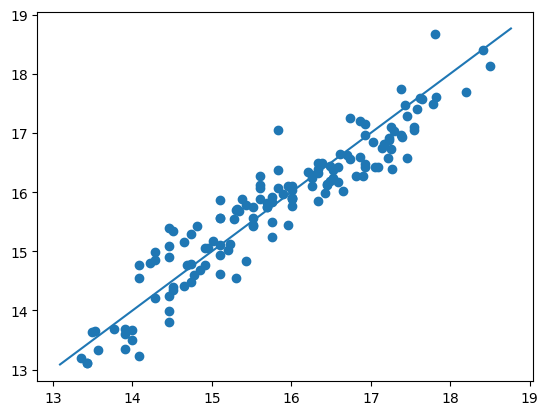

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot(plt.xlim(), plt.xlim())

In [17]:
percent_loss = np.sum(abs(np.exp(y_test) - np.exp(y_pred)) / np.exp(y_test)) * 1./len(y_test)
percent_loss

0.34273299809419955

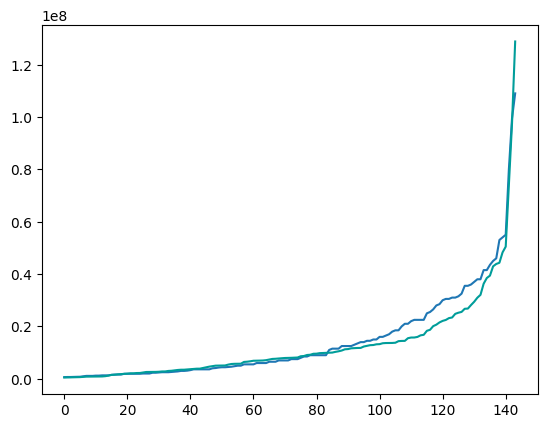

In [30]:
y_test = list(y_test)
y_test.sort()
y_pred.sort()
plt.plot(range(len(y_test)), np.exp(y_test))
plt.plot(range(len(y_test)), np.exp(y_pred), color='#009d9a')